# Configuration et Imports

In [22]:
import sys
from pathlib import Path

# Ajouter le projet au path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

# Imports PyTorch
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Imports depuis src/
from src.data_loader import get_data_loaders
from src.models import BaselineCNN
from src.utils import get_mixup_cutmix_transform
from src.trainer import train_model

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

# Chemins
TRAIN_DIR = project_root / 'data' / 'train'
VAL_DIR = project_root / 'data' / 'val'

Device: cpu


# Data Loader

In [24]:

# Charger les données
train_loader, val_loader, class_names = get_data_loaders(
    train_dir=str(TRAIN_DIR),
    val_dir=str(VAL_DIR),
    batch_size=18,
    img_size=120
)

print(f"\n✅ Classes: {class_names}")
print(f"📦 Train batches: {len(train_loader)}")
print(f"📦 Val batches: {len(val_loader)}")


✅ Classes: ['0', '1', '2', '3', '4', '5']
📦 Train batches: 757
📦 Val batches: 190


# MixUp/CutMix

In [23]:

num_classes = len(class_names)  # 6
# Transform MixUp/CutMix
mixup_cutmix = get_mixup_cutmix_transform(
    num_classes=num_classes,
    mixup_alpha=0.2,
    cutmix_alpha=1.0,
    apply_prob=0.6  # 60% de chance d'appliquer
)

# model CustomCNN

In [2]:
model = CustomCNN(num_classes=6, img_size=120)
print(model)


CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): GELU(approximate='none')
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): GELU(approximate='none')
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(24, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): GELU(approximate='none')
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affi

In [21]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()  # Gère automatiquement les soft labels de MixUp/CutMix

scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=4, factor=0.5)

# Trainer

🚀 DÉBUT DE L'ENTRAÎNEMENT - 20 epochs



📊 Epoch [1/20] - 190.70s
  Train → Loss: 1.3209, Accuracy: 51.85%
  Val   → Loss: 0.9211, Accuracy: 64.21%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.9211)
----------------------------------------------------------------------



📊 Epoch [2/20] - 171.11s
  Train → Loss: 1.0548, Accuracy: 65.14%
  Val   → Loss: 0.6481, Accuracy: 77.82%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.6481)
----------------------------------------------------------------------



📊 Epoch [3/20] - 169.51s
  Train → Loss: 0.9394, Accuracy: 70.34%
  Val   → Loss: 0.6229, Accuracy: 79.14%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.6229)
----------------------------------------------------------------------



📊 Epoch [4/20] - 171.42s
  Train → Loss: 0.9037, Accuracy: 71.82%
  Val   → Loss: 0.5841, Accuracy: 80.38%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.5841)
----------------------------------------------------------------------



📊 Epoch [5/20] - 168.32s
  Train → Loss: 0.8436, Accuracy: 74.13%
  Val   → Loss: 0.5702, Accuracy: 80.20%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.5702)
----------------------------------------------------------------------



📊 Epoch [6/20] - 169.47s
  Train → Loss: 0.8263, Accuracy: 75.13%
  Val   → Loss: 0.5111, Accuracy: 83.07%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.5111)
----------------------------------------------------------------------



📊 Epoch [7/20] - 168.99s
  Train → Loss: 0.8253, Accuracy: 75.91%
  Val   → Loss: 0.5068, Accuracy: 83.07%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.5068)
----------------------------------------------------------------------



📊 Epoch [8/20] - 167.84s
  Train → Loss: 0.8130, Accuracy: 75.68%
  Val   → Loss: 0.5070, Accuracy: 82.75%
  LR    → 0.001000
  ⚠️  Patience: 1/7
----------------------------------------------------------------------



📊 Epoch [9/20] - 167.19s
  Train → Loss: 0.7756, Accuracy: 77.52%
  Val   → Loss: 0.4818, Accuracy: 83.60%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.4818)
----------------------------------------------------------------------



📊 Epoch [10/20] - 165.42s
  Train → Loss: 0.7577, Accuracy: 77.97%
  Val   → Loss: 0.4661, Accuracy: 84.57%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.4661)
----------------------------------------------------------------------



📊 Epoch [11/20] - 165.90s
  Train → Loss: 0.7239, Accuracy: 79.24%
  Val   → Loss: 0.4922, Accuracy: 83.34%
  LR    → 0.001000
  ⚠️  Patience: 1/7
----------------------------------------------------------------------



📊 Epoch [12/20] - 164.16s
  Train → Loss: 0.7427, Accuracy: 78.73%
  Val   → Loss: 0.4546, Accuracy: 84.63%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.4546)
----------------------------------------------------------------------



📊 Epoch [13/20] - 168.03s
  Train → Loss: 0.7383, Accuracy: 79.49%
  Val   → Loss: 0.4787, Accuracy: 84.69%
  LR    → 0.001000
  ⚠️  Patience: 1/7
----------------------------------------------------------------------



📊 Epoch [14/20] - 165.96s
  Train → Loss: 0.7394, Accuracy: 79.27%
  Val   → Loss: 0.4753, Accuracy: 83.72%
  LR    → 0.001000
  ⚠️  Patience: 2/7
----------------------------------------------------------------------



📊 Epoch [15/20] - 168.91s
  Train → Loss: 0.7213, Accuracy: 80.01%
  Val   → Loss: 0.4945, Accuracy: 83.63%
  LR    → 0.001000
  ⚠️  Patience: 3/7
----------------------------------------------------------------------



📊 Epoch [16/20] - 141.45s
  Train → Loss: 0.7494, Accuracy: 78.88%
  Val   → Loss: 0.4578, Accuracy: 85.22%
  LR    → 0.001000
  ⚠️  Patience: 4/7
----------------------------------------------------------------------



📊 Epoch [17/20] - 147.65s
  Train → Loss: 0.6770, Accuracy: 80.54%
  Val   → Loss: 0.4232, Accuracy: 85.01%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.4232)
----------------------------------------------------------------------



📊 Epoch [18/20] - 140.24s
  Train → Loss: 0.7040, Accuracy: 80.23%
  Val   → Loss: 0.4214, Accuracy: 86.39%
  LR    → 0.001000
  ✅ Meilleur modèle sauvegardé! (Val Loss: 0.4214)
----------------------------------------------------------------------



📊 Epoch [19/20] - 137.67s
  Train → Loss: 0.7076, Accuracy: 80.04%
  Val   → Loss: 0.4429, Accuracy: 85.80%
  LR    → 0.001000
  ⚠️  Patience: 1/7
----------------------------------------------------------------------



📊 Epoch [20/20] - 131.60s
  Train → Loss: 0.7074, Accuracy: 80.26%
  Val   → Loss: 0.4514, Accuracy: 85.33%
  LR    → 0.001000
  ⚠️  Patience: 2/7
----------------------------------------------------------------------

✅ ENTRAÎNEMENT TERMINÉ en 54.03 minutes
   Meilleur epoch: 18 | Best Val Loss: 0.4214


C:\Users\SOL\AppData\Local\Temp\ipykernel_18932\1530364206.py:237: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SOL\AppData\Local\Temp\ipykernel_18932\1530364206.py:238: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig('training_history.png', dpi=300, bbox_inches='tight')



📊 Graphiques sauvegardés: training_history.png


C:\Users\SOL\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


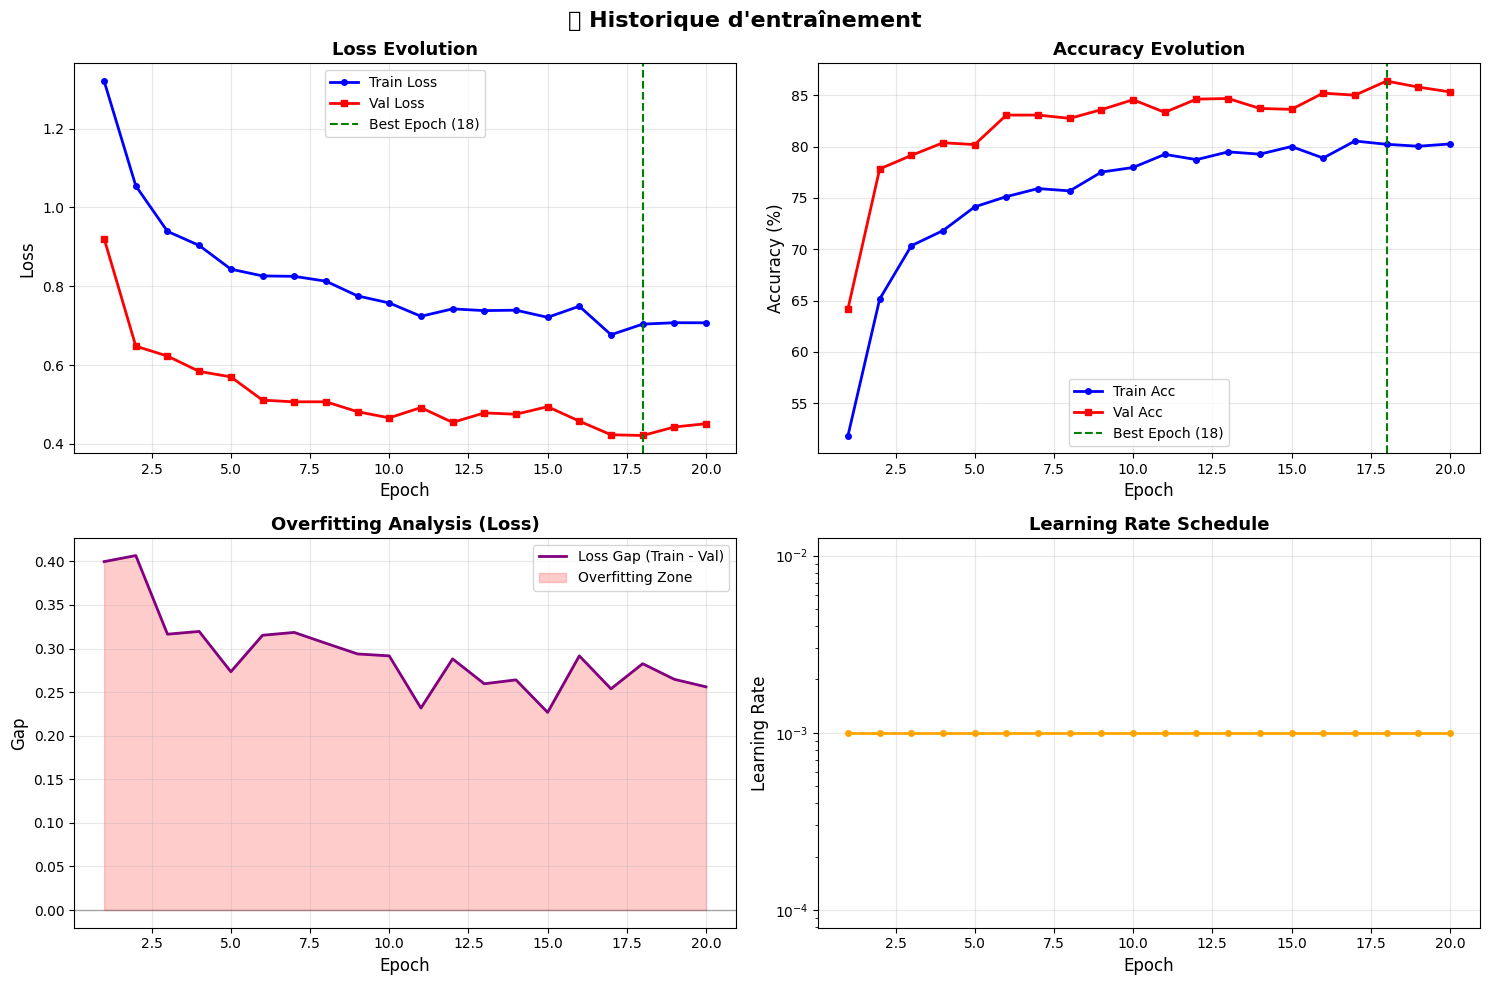


📋 RÉSUMÉ STATISTIQUE
Train Loss → Min: 0.6770, Max: 1.3209, Final: 0.7074
Val Loss   → Min: 0.4214, Max: 0.9211, Final: 0.4514
Train Acc  → Min: 51.85%, Max: 80.54%, Final: 80.26%
Val Acc    → Min: 64.21%, Max: 86.39%, Final: 85.33%
Overfitting Gap → -5.08% (Train - Val)
[64.21237899677325, 77.82340862422998, 79.14344382516867, 80.37547667937811, 80.19947198591963, 83.07421531240833, 83.07421531240833, 82.75154004106776, 83.60222939278381, 84.57025520680551, 83.33822235259606, 84.62892343795835, 84.68759166911117, 83.71956585508947, 83.63156350836022, 85.21560574948666, 85.01026694045174, 86.38897037254327, 85.80228806101496, 85.33294221179231]


In [10]:
history = train_with_mixup_cutmix(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    num_epochs=20,
    device='cpu',
    early_stopping_patience=7,
    save_best_model=True,
    model_path='best_model.pth'
)
